## Contents
- 정규 표현식이란?
- 왜 정규 표현식을 배워야 하나?
- 기본 메커니즘_맛보기
- 위치
- 대표문자
- 수량자
- 범위
- groups
- 정규표현식 Cheat Sheet
- 참고 홈페이지

# 정규 표현식 (Regular Expression)

- 텍스트의 패턴을 이용해서 찾고자 하는 내용을 추출하는 표현식
- 글 따위의 여러 문자의 모음에서 폰번호나 이메일을 추출 할 때 사용
    - 폰번호의 패턴(0xx-xxxx-xxxx, x는 0~9사이), 이메일 패턴(xxxxx@xxxx.com, xxxx@gmail.com 등)
- 폴더 안에 확장자가 그림파일만 가져오는 함수 작성할 때 사용
    - if .jpg->elif .png ->elif .gif(X) => 정규표현식 한 줄로 처리 가능 `.+\.(?:jpg|png|gif|bmp)`
- 정규식, Regex(????) 등으로도 불림

> [개발 하시는 분들, 'Regex' 어떻게 읽으시나요?!! ](https://www.clien.net/service/board/park/7724324)

## 실제 예
- 영화 리뷰를 분석하기 위해서는 영화 리뷰에 관련한 데이터가 필요하다

> 네이버 영화를 켜봅시다.
1. 영화를 여러개 창으로 켜봅니다.
2. URL을 비교를 합니다.
3. `No=`다음에 붙은 숫자가 영화를 뜻 함

?????
?????

- 저 숫자는 영화를 뜻하는 유니크한 숫자`(Key value!!!)`이기 때문에 잘 정리해 놓아야 한다.
    - ex) 겨울왕국2 = ?????
- 이렇게 정리해놓으면 우리가 겨울왕국2를 숫자로 찾을 수 있다.
    > 현업에서도 그렇게 합니다.

# 기본 메커니즘
1. **문자 ???? 인식**  
`나는 사과를 먹었다.`  
`사과`라는 글자는 -> `사` 다음에 `과`으로 이루어진 글자
2. **????문자 구별**
`apple != Apple`


Q. 영화 url 뒤에 있는 숫자만 추출하라

In [1]:
url='https://movie.naver.com/movie/bi/mi/basic.nhn?code=136873'

In [2]:
url[-6:]

'136873'

Q. 두 개라면?

In [3]:
urls_text='https://movie.naver.com/movie/bi/mi/basic.nhn?code=136873\nhttps://movie.naver.com/movie/bi/mi/basic.nhn?code=189053'

In [4]:
urls_text.split('\n')

['https://movie.naver.com/movie/bi/mi/basic.nhn?code=136873',
 'https://movie.naver.com/movie/bi/mi/basic.nhn?code=189053']

맛보기

- 정규표현식 모듈 `re`

[공식문서](https://docs.python.org/3/howto/regex.html)

In [5]:
import re

- url이 text로 묶여져 있을 경우

In [6]:
urls_text='https://movie.naver.com/movie/bi/mi/basic.nhn?code=136873\nhttps://movie.naver.com/movie/bi/mi/basic.nhn?code=189053'

In [7]:
re.findall('\d+$',urls_text,flags=re.MULTILINE)

['136873', '189053']

- url이 List로 묶여져 있을 경우

In [43]:
urls_list = ['https://movie.naver.com/movie/bi/mi/basic.nhn?code=136873','https://movie.naver.com/movie/bi/mi/basic.nhn?code=189053']

In [14]:
m_urls = []
for url in urls_list:
    m_urls.????(re.findall('\d+$',url))
m_urls

['136873', '189053']

# 위치

`????`:시작  
`????`: 끝

In [54]:
source = "python is python"

In [57]:
re.findall('python',source)

['python', 'python']

In [58]:
re.findall('?????', source)

['python']

> 전체에서 python으로 시작한 것을 가지고 오라

In [59]:
re.findall('?????', source)

['python']

> 전체에서 python으로 끝난 것을 가지고 오라

# 대표문자

???? : 모든 문자

In [8]:
source = "장첸 010-1234-1234 인민족 1000$"
print(re.findall('.',source))

['장', '첸', ' ', '0', '1', '0', '-', '1', '2', '3', '4', '-', '1', '2', '3', '4', ' ', '인', '민', '족', ' ', '1', '0', '0', '0', '$']


????: 모든 숫자

In [9]:
source = "장첸 010-1234-1234 인민족 1000$"
re.findall('\d',source)

['0', '1', '0', '1', '2', '3', '4', '1', '2', '3', '4', '1', '0', '0', '0']

?????: 기능용 문자

> 맛보기

Q. 쌍따옴표(")4개 or 홑따옴표('')4개를 이용해서 아래 문장을 완성해 보아라  
    (쌍따옴표, 홑따옴표 혼합은 안됨)

In [86]:
'그녀가 말했습니다. "안녕"'

'그녀가 말했습니다. "안녕"'

In [75]:
"그녀가 말했습니다. '안녕'"

"그녀가 말했습니다. '안녕'"

In [77]:
"그녀가 말했습니다. "안녕""

SyntaxError: invalid syntax (<ipython-input-77-f71d8619560a>, line 1)

In [10]:
re.findall('\d+\$', source)

['1000$']

- 이스케이프(escape)
> "키보드로 표현하기 힘든 문자를 표현"  
> "특수한 기능을 표현하는 문자"
    - 문법: `\\(backslash)+특정문자`, 엔터키 위에 있는거 backslash(`\`)
    - \n: 줄 바꿈
    - \t: 탭
    - \\: `\`

Q. 달러표시와 함께 자산을 출력하라(1)

In [66]:
??????

['1000$']

Q. 달러표시와 함께 자산을 출력하라(2)- source의 끝에서 가져와라

In [153]:
??????

['1000$']

`\w`: 글자를 대표, 특수문자는 포함하지 않지만, _(언더스코어)는 포함

In [97]:
print(re.findall('\w',source))

['장', '첸', '0', '1', '0', '1', '2', '3', '4', '1', '2', '3', '4', '인', '민', '족', '1', '0', '0', '0']


`\W`:글자 대표 문자를 제외한 글자들(특수문자, 공백 등)

In [99]:
print(re.findall('\W',source))

[' ', '-', '-', ' ', ' ', '$']


`\s`: 공백 문자(스페이스, 탭, 뉴라인)
`\S`: 공백 문자를 제외한 문자
`\D`: 숫자를 제외한 문자

In [103]:
print(re.findall('\D',source))

['장', '첸', ' ', '-', '-', ' ', '인', '민', '족', ' ', '$']


# 수량자

????? 하나이상

In [127]:
source

'장첸 010-1234-1234 인민족 1000$'

In [158]:
re.findall('\d+\$$',source)

['1000$']

`*`: 0개 이상

In [161]:
re.findall('\d*\$$',source)

['1000$']

`?`: ?????

In [167]:
source = '01012341234 010-4567-4567'

Q. 앞의 전화번호가 모두 출력되게 작성하라

In [169]:
????

['01012341234', '010-4567-4567']

`{n}`: 연속 n번 등장

In [171]:
re.findall('\d{3}-?\d{4}-?\d{4}',source)

['01012341234', '010-4567-4567']

`{n:m}`: n번에서 m번 등장

In [173]:
source = 'phone 01012341234 home 02-1234-1234'

In [175]:
re.findall('\d{2,3}-?\d{4}-?\d{4}',source)

['01012341234', '02-1234-1234']

# 범위

`[]`: 내부에 해당하는 문자열의 범위 중 한 문자만 선택
  - 내부에서는 위의 **대표문자가 사용할 수 없거나 의미가 다르게 사용**

소문자 모음만 탐색

In [182]:
re.findall('[aeiou]',source) #a or e or i or o or u

['o', 'e', 'o', 'e']

In [193]:
source = '01012341234\n010-4567-4567\n010 1234 1234'

Q. 세 개 전화번호를 모두 출력하시오

In [198]:
??????

['01012341234', '010-4567-4567', '010 1234 1234']

알파벳 26글자를 다 탐색하려면?

In [238]:
source = 'phone 01012341234 home 02-1234-1234'

In [207]:
re.findall('[?????]',source)

['p', 'h', 'o', 'n', 'e', 'h', 'o', 'm', 'e']

`[ - ]` : -(대쉬)를 이용해서 범위를 지정해 줄 수 있다.
- 범위는 유니코드 기반으로 정할 수 있음

숫자만 제외하고 탐색

`^(caret)`: 제외

> `[]`안에서는 대표문자가 다르게 쓰인다

In [232]:
re.findall('[^0-9]',source)

['p', 'h', 'o', 'n', 'e', ' ', ' ', 'h', 'o', 'm', 'e', ' ', '-', '-']

알파벳 소문자만 탐색

In [226]:
re.findall('[a-z]',source)

['p', 'h', 'o', 'n', 'e', 'h', 'o', 'm', 'e']

In [227]:
re.findall('[a-z]+',source)

['phone', 'home']

알파벳 대소문자 탐색

In [242]:
re.findall('[a-zA-Z]+',source)

['phone', 'home']

### 어느 알파벳이 먼저인지 판단하기 어려울 때

1. [구글에 유니코드 검색](https://www.google.com/search?q=%EC%9C%A0%EB%8B%88%EC%BD%94%EB%93%9C&tbm=isch&ved=2ahUKEwintcuD0O3rAhXPA6YKHUyXDHYQ2-cCegQIABAA&oq=%EC%9C%A0%EB%8B%88%EC%BD%94%EB%93%9C&gs_lcp=CgNpbWcQAzICCAAyAggAMgIIADICCAAyAggAMgIIADICCAAyAggAMgIIADICCAA6BggAEAcQHlDS_wJYqIsDYNqUA2gEcAB4AYABdogBtQaSAQM3LjKYAQCgAQGqAQtnd3Mtd2l6LWltZ8ABAQ&sclient=img&ei=Kf5hX-f8Fs-HmAXMrrKwBw#imgrc=UaqdTsxrWxtalM)

i 부터 p부터 알파벳만 탐색

In [221]:
re.findall('[i-p]',source)

['p', 'o', 'n', 'o', 'm']

In [222]:
re.findall('[p-i]',source)

error: bad character range p-i at position 1

> 순서가 i가 p보다 먼저다

2. `ord`함수 이용

In [212]:
ord('p')

112

In [216]:
ord('i')

105

한글은 어떻게 해야할까?

[한글 유니코드 순서 참조](https://jjeong.tistory.com/696)

In [224]:
????('가')

44032

In [223]:
ord('힣')

55203

In [233]:
re.findall('[가-힣]',source)

[]

# groups

`(  )`: subgroup으로 저장

## capturing group

- subgroup의 토큰들을 그룹화함

In [358]:
source = 'vcas3.word\ncsacd.pdf\nasdfsd.jpg\nasdfsf.bmp'

In [359]:
re.findall('(.+)\.(??????)+', source)

[('asdfsd', 'jpg'), ('asdfsf', 'bmp')]

## non-capturing group

- capturing하지않고 여러 토큰을 그룹화함

In [371]:
re.findall('.+\.(????jpg|png|gif|bmp)', source)

['asdfsd.jpg', 'asdfsf.bmp']

## lookahead / lookbehind

- 패턴만 찾고 결과 문자열에 출력되지 않음  
`(?<=)...`: lookbehind, 후방탐색, 패턴 찾고 뒤의 문자열을 출력함  
`...(?=)`: lookahead, 전방탐색, 패턴 찾고 앞의 문자열을 출력함  


In [380]:
re.findall('.+\.(?????jpg|png|gif|bmp)', source)

['asdfsd.', 'asdfsf.']

In [384]:
re.findall('(?????)\..+', source)

['.word', '.pdf', '.jpg', '.bmp']

Q. 아래 결과물처럼 id와 From 사이를 뽑아내어라  
규칙1) id는 숫자와 대시로만 이루어져 있거나 끝에 _M이 붙는다.  
규칙2) 작성한 규칙1이 아닐경우 'No'로 대체된다

In [386]:
import pandas as pd

In [422]:
quiz_df=pd.DataFrame({'id':['id:41432-54243_M\nFrom','id:4213-32 \nFrom','id:4321-54_MFrom','error']})

In [434]:
for id in quiz_df['id']:
    print(id,end='\n\n')

id:41432-54243_M
From

id:4213-32 
From

id:4321-54_MFrom

error



결과물

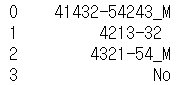

In [424]:
??????

In [425]:
quiz_df['id'].map(????)

0    41432-54243_M
1         4213-32 
2        4321-54_M
3               No
Name: id, dtype: object

# 정규표현식 Cheat Sheet

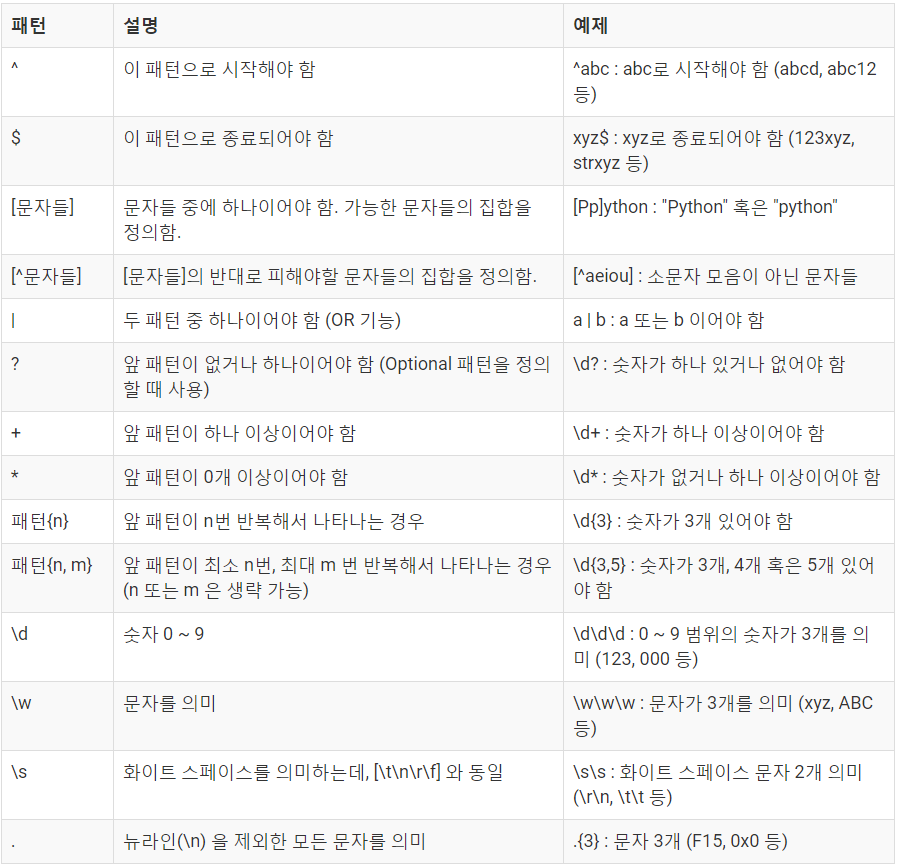

# 참고 홈페이지

- 학습공간
    - [생활코딩 정규표현식](https://opentutorials.org/course/909/5142)
    - [그림으로 표시](http://nextree.co.kr/p4327/)

- 정규 표현식 연습 https://regexr.com/
- 정규 표현식 게임 https://regexcrossword.com/

> ## 문법이 엄청나게 방대함, 완벽하게 이해하고 있는 사람 거의 전무! 구글링 필수!  